## Import Necessary Utilities and Set Up Data Paths


In [18]:
from analyse_utils import *

COMMITS_DATA_PATH = "../data/commits/*.json"
ISSUES_DATA_PATH = "../data/issues/*.json"
CSV_FILE_PATH = "../dataset/dataset_filtrado.csv"
PULL_FILES_DATA_PATH = "../data/pull_request/*.json"

### Step 1: Load and Preprocess Commit Data


In [19]:
print("Loading commit data...")
commits_df = load_all_commits(COMMITS_DATA_PATH)
print(f"Total commits loaded: {len(commits_df)}")

Loading commit data...
Total commits loaded: 127118


### Step 2: Enrich Commit Data with Additional Metrics


In [20]:
print("Enriching commit data...")
commits_df = enrich_commit_data(commits_df)

Enriching commit data...


### Step 3: Load and Preprocess Issue Data


In [21]:
print("Loading issue data...")
issues_df = load_all_issues(ISSUES_DATA_PATH)
print(f"Total issues loaded: {len(issues_df)}")

Loading issue data...


Total issues loaded: 70391


### Step 4: Enrich Issue Data with Additional Metrics


In [22]:
print("Enriching issue data...")
issues_df = enrich_issue_data(issues_df)
# Filter issues with PRs
issues_with_prs = issues_df.loc[issues_df["is_pull_request"]]

Enriching issue data...


### Step 5: Load and Process CSV Data


In [23]:
print("Loading CSV data...")
csv_df = load_csv_data(CSV_FILE_PATH)
print(f"Total projects loaded from CSV: {len(csv_df)}")

print("Loading pull request data...")
prs_df = load_all_pull_requests(PULL_FILES_DATA_PATH)
print(f"Total pull requests loaded: {len(prs_df)}")

Loading CSV data...
Total projects loaded from CSV: 11
Loading pull request data...
Total pull requests loaded: 41222


### Step 6: Enrich CSV Data


In [24]:
print("Enriching CSV data...")
csv_df = enrich_csv_data_two_groups(csv_df)

Enriching CSV data...
Median: 4.0


## CSV Data Analysis


### Analyze Programming Language Usage


Analyzing programming language usage...


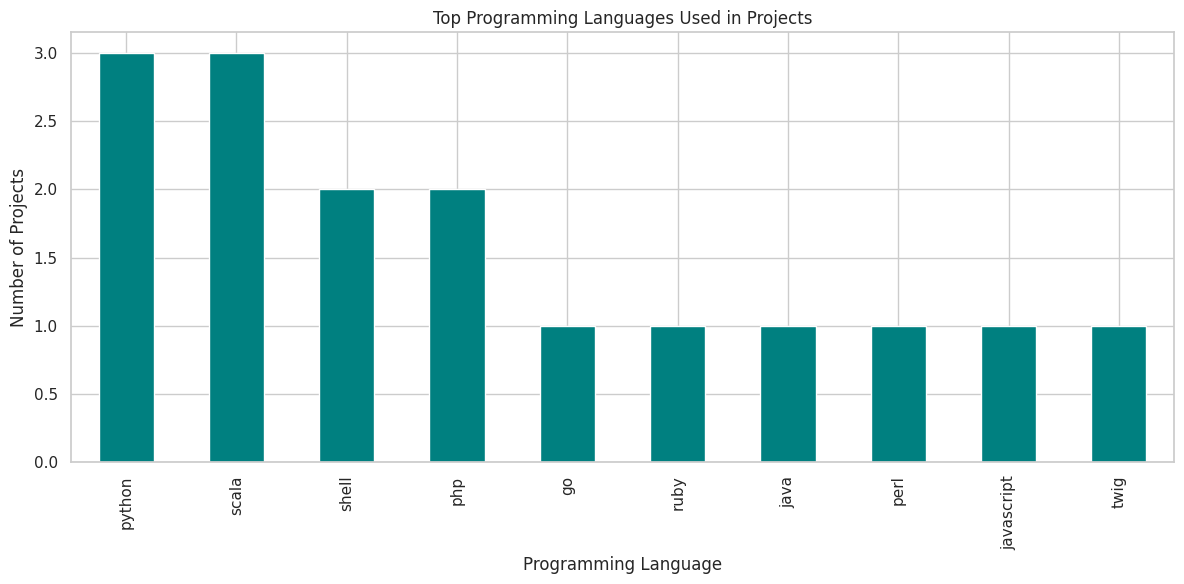

In [25]:
print("Analyzing programming language usage...")
language_counts = analyze_language_usage(csv_df)
plot_language_usage(language_counts)

### Analyze Microservice Distribution


Analyzing microservice distribution...


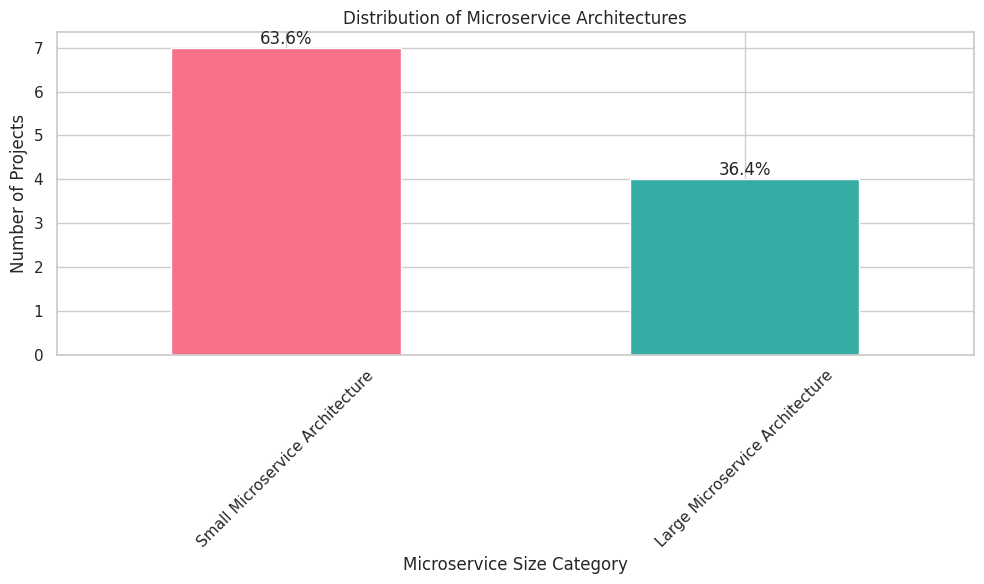

In [26]:
# Analyze microservice distribution
print("Analyzing microservice distribution...")
microservice_counts = analyze_microservice_distribution(csv_df)
plot_microservice_distribution(microservice_counts)

## RQ1. What is the current status and evolution of open microservice repositories?

### RQ1.1: Is Community Engagement Increasing?


Analyzing community engagement over time...


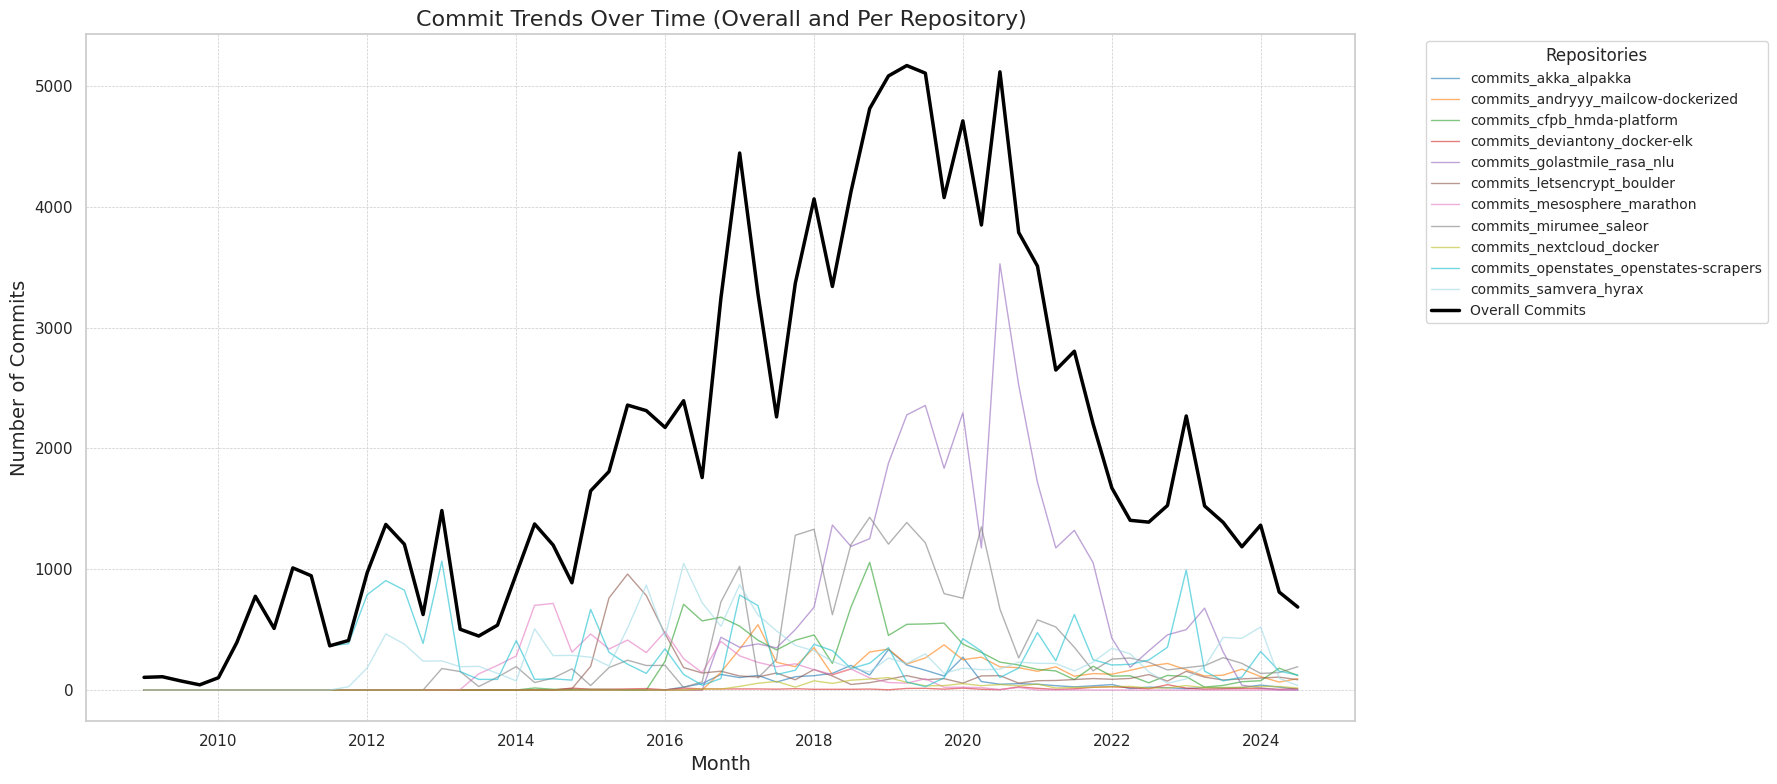

In [27]:
print("Analyzing community engagement over time...")
overall_commit_trends, repo_commit_trends = analyze_commit_trends(commits_df)
plot_commit_trends_per_repo(overall_commit_trends, repo_commit_trends)


#### In the analyzed repositories, community engagement experienced significant growth between 2018 and 2021. This could be related to the maturation of the repositories and the effects of the pandemic. However, further studies are needed to establish a clear connection with the pandemic.

### RQ1.2: Are There Prominent Authors?


Identifying prominent authors...


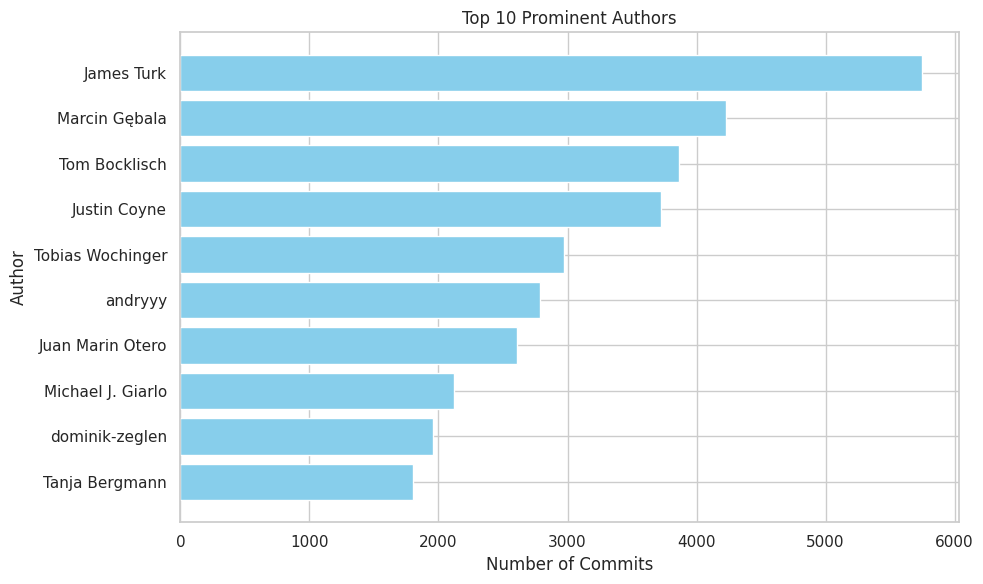

In [28]:
print("Identifying prominent authors...")
prominent_authors = identify_prominent_authors(commits_df)
plot_prominent_authors(prominent_authors)

##### As observed by the plot, there are several authors that contributions exceed the average number of commits across the projects. This highlights their significant involvement and leadership in the development and maintenance of these repositories.

### RQ1.3: Do Authors Contribute to Multiple Projects?


Analyzing cross-project contributions...


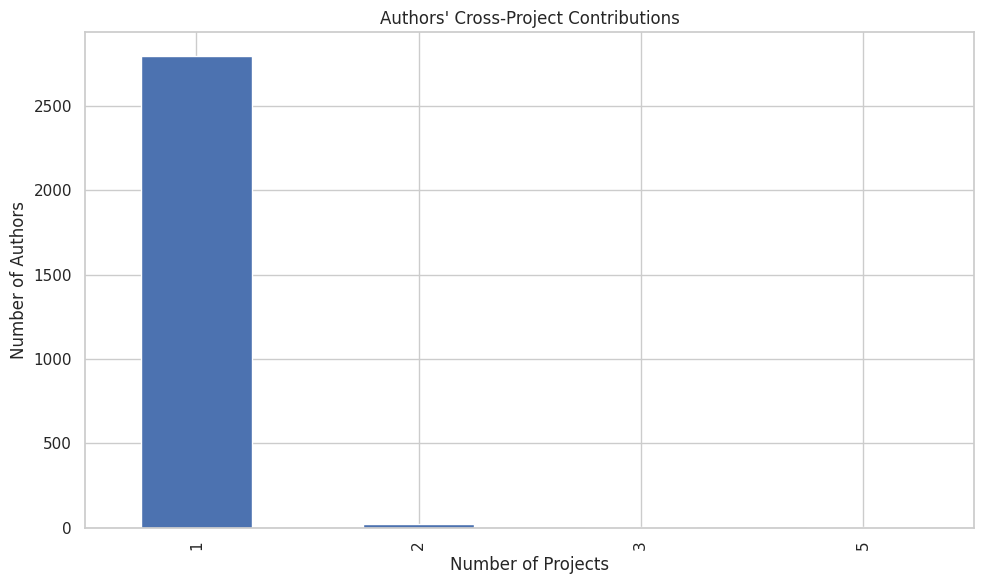

In [29]:
print("Analyzing cross-project contributions...")
author_projects = analyze_author_cross_project_contributions(commits_df)
plot_author_project_contributions(author_projects)

##### The majority of authors contribute to only one repository, as shown by the significant concentration of authors in the "1" category.

## RQ2. How can closed PR data be utilized to assess the maintenance time of open microservice repositories?


### RQ2.1: What Is the Average Issue Resolution Time?


Calculating average issue resolution time...


Average Issue Resolution Time: 10.66 days


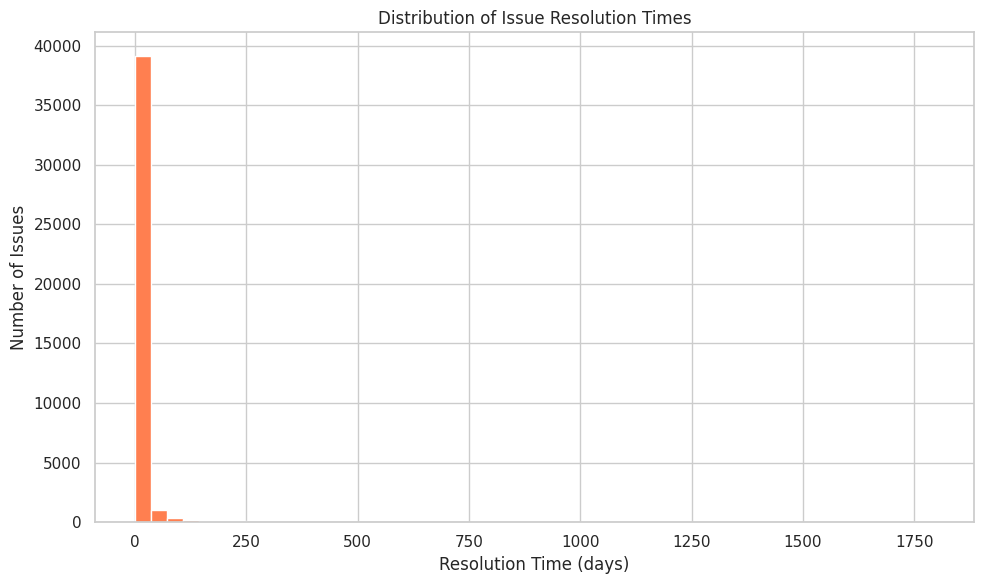

Removing outliers...
Removed outliers: 4131 rows
Average Issue Resolution Time Without: 3.47 days


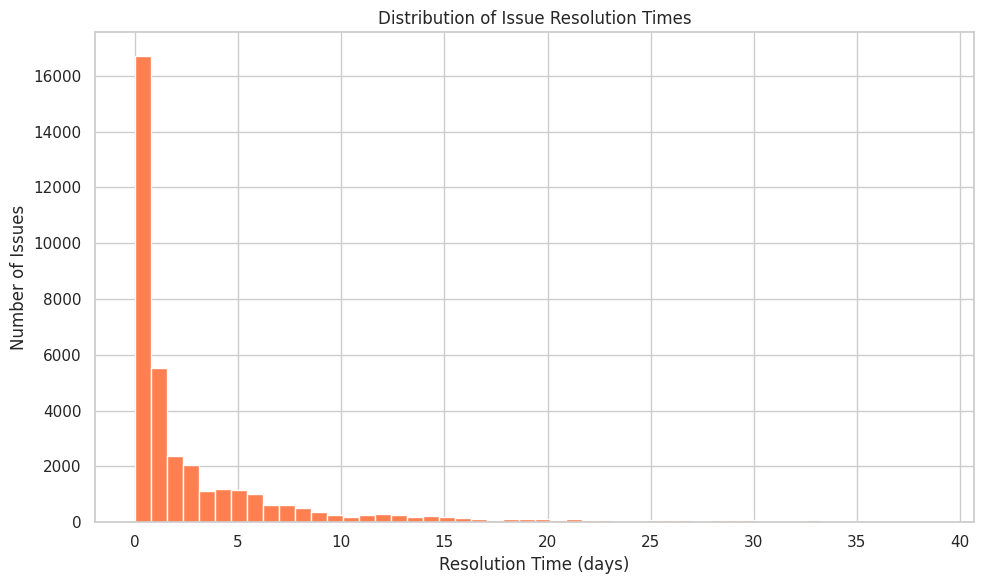

In [30]:
print("Calculating average issue resolution time...")
avg_resolution_time = calculate_average_issue_resolution_time(issues_with_prs)
print(f"Average Issue Resolution Time: {avg_resolution_time:.2f} days")
plot_issue_resolution_time(issues_with_prs)

print("Removing outliers...")
filtered_issues = remove_outliers(
    issues_with_prs, "resolution_time", lower_percentile=0.05, upper_percentile=0.95
)
avg_resolution_time_filtered = calculate_average_issue_resolution_time(filtered_issues)

print(f"Average Issue Resolution Time Without: {avg_resolution_time_filtered:.2f} days")

plot_issue_resolution_time(filtered_issues)

##### The average issue resolution time is 10.66 days. When outliers are removed, the average decreases to 3.47 days, indicating that a small number of long-resolution cases significantly impact the overall average.

### RQ2.2: Impact of PR Size on Issue Resolution Time


Analyzing impact of PR size on issue resolution time...


/home/sersasj/Uem/Mestrado/TESS-work/replication_package/src/analyse_utils.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_df["pull_number"] = issues_df["pull_number"].astype(str)


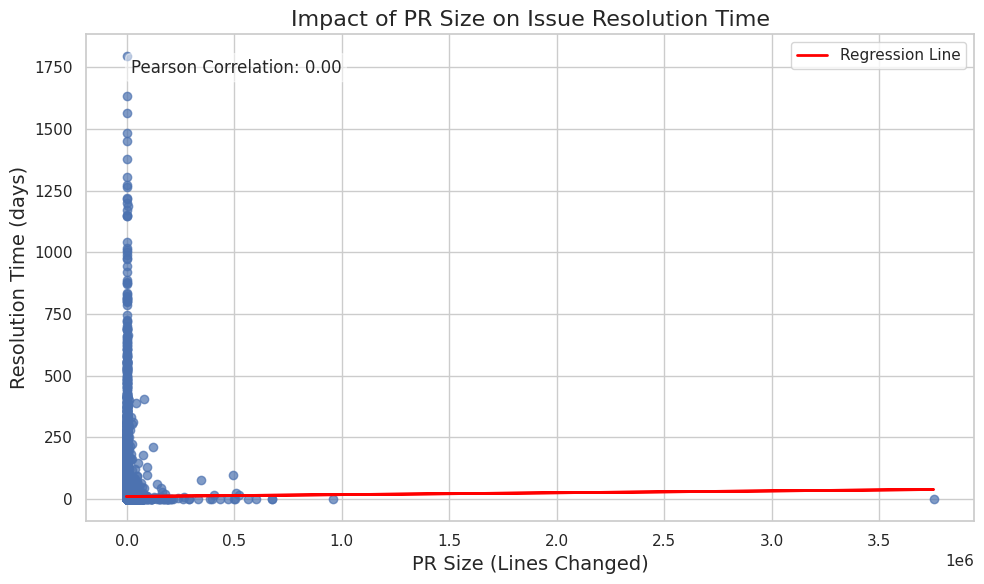

Removed outliers: 4121 rows
Removed outliers: 2623 rows
Plotting PR size vs. resolution time (without outliers)...


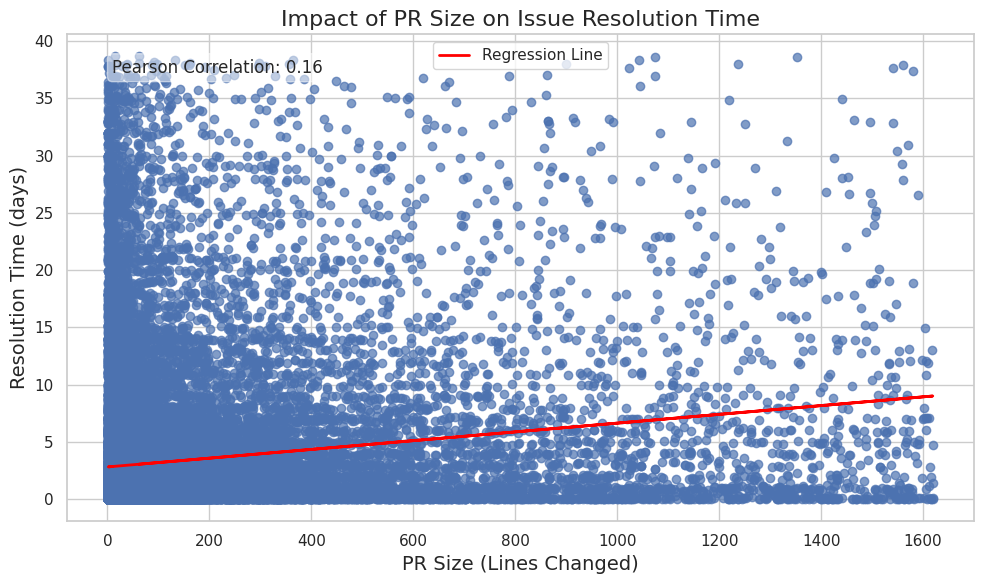

In [31]:
print("Analyzing impact of PR size on issue resolution time...")
impact_df = impact_of_pr_size_on_resolution_time(issues_with_prs, prs_df)
plot_pr_size_vs_resolution_time(impact_df)

# Remove outliers for a clearer analysis
impact_df_no_outliers = remove_outliers(
    impact_df, "resolution_time", lower_percentile=0.05, upper_percentile=0.95
)
impact_df_no_outliers = remove_outliers(
    impact_df_no_outliers, "total_changes", lower_percentile=0.05, upper_percentile=0.95
)

print("Plotting PR size vs. resolution time (without outliers)...")
plot_pr_size_vs_resolution_time(impact_df_no_outliers)

##### A correlation cannot be determined from the plot, but a large cluster of points suggests that smaller PR sizes tend to be resolved more quickly. However, there are exceptions, as some large PRs (e.g., over 1000 lines) are resolved quickly, while some small PRs take longer.







### RQ2.3: Impact of Contributors on Issue Resolution Time


Analyzing impact of contributors on issue resolution time...


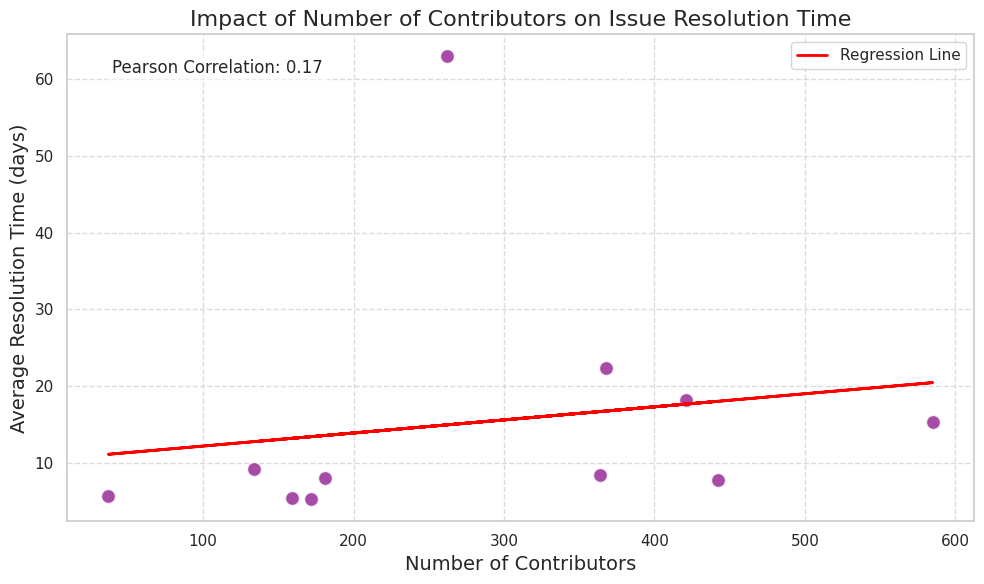

In [32]:
print("Analyzing impact of contributors on issue resolution time...")

plot_contributor_count_vs_resolution_time(issues_with_prs)


### A correlation cannot be determined from the plot. The 0.17 pearson correlations suggets a weak correlation, neverthelles, the number of N is too small.


### RQ2.4: Proportion of Issues That Are Pull Requests


In [33]:
print("Calculating proportion of issues that are PRs...")
pr_issue_proportion = calculate_pr_issue_proportion(issues_df)
print(f"Proportion of Issues that are PRs: {pr_issue_proportion:.2%}")

Calculating proportion of issues that are PRs...
Proportion of Issues that are PRs: 58.71%


##### Only 58.71% were found to have PR(s), which shows that many issues, despite being closed, had no modifications made to the code.

### RQ2.5: Issue Resolution Time vs. Repository Microservice Size


Analyzing issue resolution time by microservice size...

Microservice Categories: ['Large Microservice Architecture' 'Small Microservice Architecture']

Groups for Kruskal-Wallis Test:
Large Microservice Architecture: 4 repos
Small Microservice Architecture: 7 repos

Kruskal-Wallis H-test Results:
Statistic: 6.0357, p-value: 0.0140

There is a statistically significant difference in average issue closure times between microservice size categories.

Dunn's Test Results (Adjusted p-values):
                                 Large Microservice Architecture  \
Large Microservice Architecture                         1.000000   
Small Microservice Architecture                         0.014019   

                                 Small Microservice Architecture  
Large Microservice Architecture                         0.014019  
Small Microservice Architecture                         1.000000  

Significant Pairwise Differences (p < 0.05):
Large Microservice Architecture vs Large Microservice 

/home/sersasj/Uem/Mestrado/TESS-work/replication_package/src/analyse_utils.py:787: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


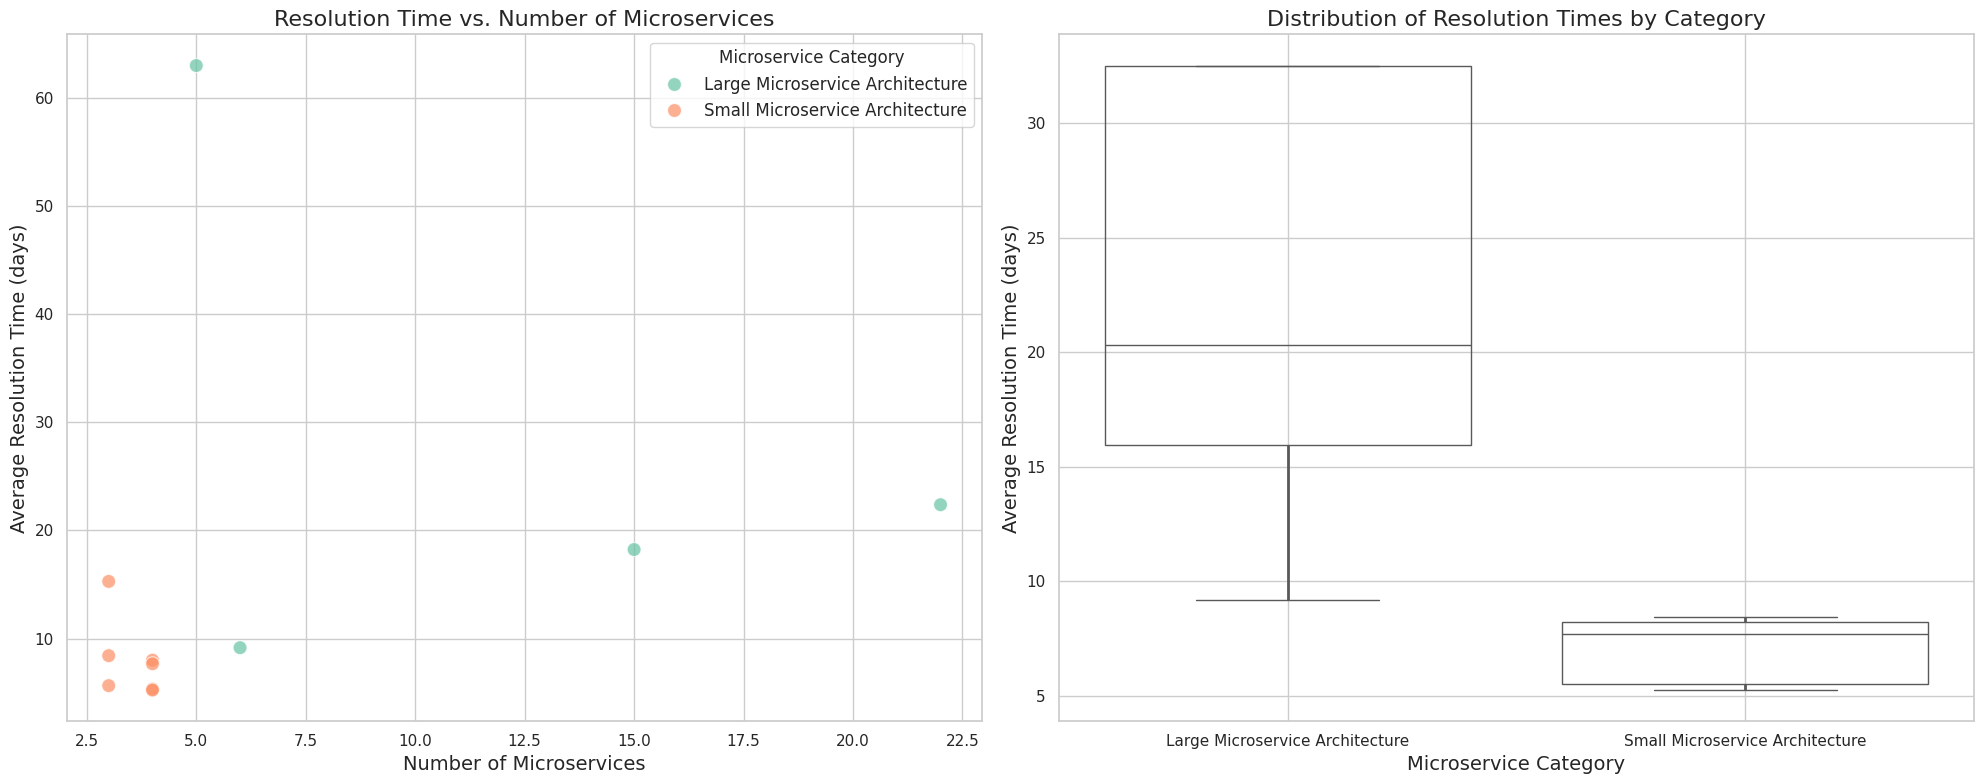

In [34]:
print("Analyzing issue resolution time by microservice size...")
average_df = analyze_issue_resolution_time_by_microservice_size(issues_with_prs, csv_df)
plot_service_numbers_vs_resolution_time(average_df)

##### The analysis of RQ2.5 revealed a statistically significant difference in issue resolution times between repositories with large and small microservice architectures (Kruskal-Wallis p = 0.014). Specifically, smaller microservice architectures tend to have faster issue resolution compared to larger ones.